¡Hola, Erika!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Priorización y análisis pruebas A/B de Hipótesis para incrementar ingresos

### Por: Erika Sánchez

### Etapa 1: Pre procesamiento de datos

In [24]:
#importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [25]:
#cargar datasets

hypotheses= pd.read_csv("/datasets/hypotheses_us.csv", sep=";")
visits = pd.read_csv("/datasets/visits_us.csv")
orders = pd.read_csv("/datasets/orders_us.csv")

In [26]:

#explorar datos DF hypotheses

print(hypotheses.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


In [27]:
#explorar datos DF visits

print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [28]:
#ajustar tipo de datos columna "date"

visits["date"] = pd.to_datetime(visits["date"])
print(visits.info())
print(visits.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None
        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756


In [29]:
#explorar datos DF orders

print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None


In [30]:
#ajustar tipo de datos columna "date"

orders["date"] = pd.to_datetime(orders["date"])
print(orders.info())
print(orders.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None
   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B


In [31]:
# Verificar si hay visitantes en ambos grupos
visitantes_A = set(orders[orders['group'] == 'A']['visitorId'])
visitantes_B = set(orders[orders['group'] == 'B']['visitorId'])

# Encontrar visitantes que están en ambos grupos
visitantes_duplicados = visitantes_A.intersection(visitantes_B)
print(f"Visitantes en ambos grupos: {len(visitantes_duplicados)}")

Visitantes en ambos grupos: 58


In [32]:
# Eliminar todos los registros de visitantes que aparecen en ambos grupos
orders_clean = orders[~orders['visitorId'].isin(visitantes_duplicados)]
orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


Para garantizar la limpieza de los datos, se eliminan 181 registros de 58 usuarios que estaban duplicados (tanto en el grupo A como en el grupo B)

### Parte 1: Priorizar Hipótesis

In [33]:
#ICE Score


hypotheses["ICE"]= (hypotheses["Impact"]*hypotheses["Confidence"])/hypotheses["Effort"]
print(hypotheses[["Hypothesis", "ICE"]].sort_values(by="ICE", ascending=False))


                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [34]:
#RICE Score
hypotheses["RICE"]= (hypotheses["Reach"]*hypotheses["Impact"]*hypotheses["Confidence"])/hypotheses["Effort"]
print(hypotheses[["Hypothesis", "RICE"]].sort_values(by="RICE", ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Las hipotesis con índice 0 y 7 permanecen en el top 3 de priorización utilizando las dos escalas (ICE y RICE). El único cambio se ve en las Hipotesis con índice 8 y 2, esta primera estando en la posición 1 en la escala ICE, y la segunda estando en la posición 2 de la escala de RICE. 

Esto se debe a que:

- ICE prioriza lo más impactante y fácil de ejecutar.
- RICE prioriza lo que tiene mayor impacto multiplicado por la cantidad de usuarios alcanzados.

Por eso los tops se ven así:

ICE: Ganarán hipótesis “poderosas” pero quizás con alcance limitado.

RICE: Ganarán hipótesis que beneficien a MUCHOS usuarios aunque el impacto individual sea menor.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, Erika. Excelente trabajo aplicando, analizando y comparando los frameworks RICE e ICE. Solamente para complementar puedes hacer un análisis de los hallazgos para la priorización de las hipótesis.  </div>

### Parte 2: Análisis test A/B

2.1 Ingreso acumulado por grupo

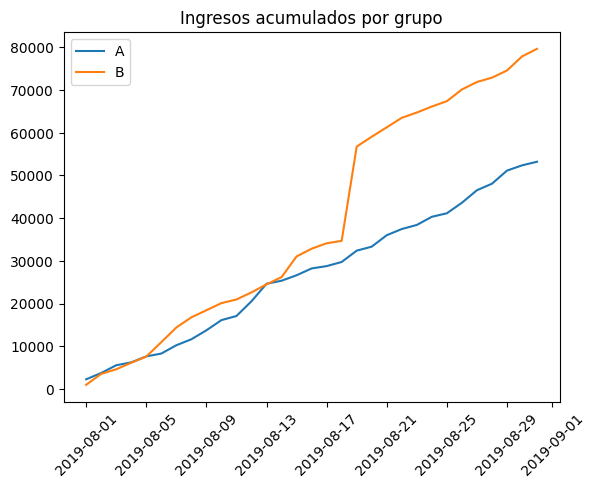

In [35]:
# preparar datos para análisis e tendencia por fecha (obtener fechas unicas por grupo)
datesGroups= orders_clean[["date", "group"]].drop_duplicates()

# obtener datos diarios acumulados de pedidos
ordersAggregated = datesGroups.apply(lambda x: orders_clean[np.logical_and(orders_clean['date'] <= x['date'], orders_clean['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#obtener datos diarios acumulados sobre visitantes
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

#fusionar las dos tablas de pedidos y visitantes
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

# DF con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DF con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title("Ingresos acumulados por grupo")
plt.xticks(rotation=45)
plt.legend()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, gran trabajo con el desarrollo y análisis del gráfico de los ingresos acumulados por grupo.   </div>


Al inicio de la prueba los dos grupos tenian ingresos acumulados similares, hasta el dìa 17 de agosto, que los ingresos del grupo B incrementaron significativamente con respecto al grupo A, lo que podrìa significar un aumento significativo en los pedidos a partir de esa fecha o pedidos muy caros

2.2 Tamaño promedio de compra acumulado por grupo

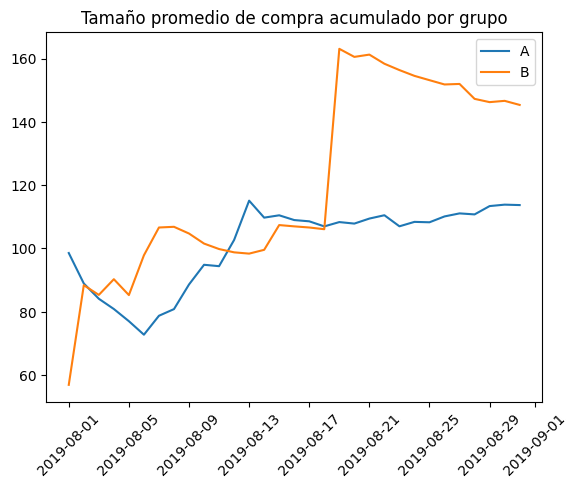

In [36]:
#trazar el grafico y dividir los ingresos acumulados entre el numero acumulado de pedidos
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title("Tamaño promedio de compra acumulado por grupo")
plt.xticks(rotation=45)
plt.legend()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, gran trabajo con el desarrollo y análisis del gráfico de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A  </div>

El tamaño promedio del pedido se estabiliza para el grupo A despues del 13 de agosto, mientras que el grupo B tiene una tendencia creciente con un pico muy alto y aumento significativo desde el dia 17 de agosto. Para el grupo B al tener este comportamiento, requiere mas datos para poder calcular su tamaño prom. de compra, como un grafico de diferencia relativa para este grupo para esa variable

2.3 Diferencia relativa del tamaño de compra promedio acumulado para el grupo B

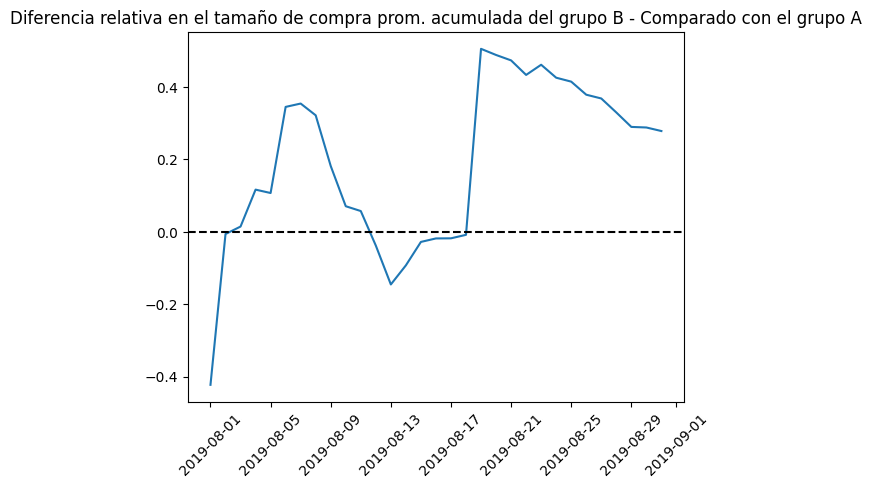

In [37]:
# reunir los datos en un DF
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
plt.title("Diferencia relativa en el tamaño de compra prom. acumulada del grupo B - Comparado con el grupo A")

# agregar linea punteada en el eje X
plt.axhline(y=0, color='black', linestyle='--')



La grafica tiene varios picos lo que podrìa significar valores atipicos.

2.4 Tasa de conversión de cada grupo 

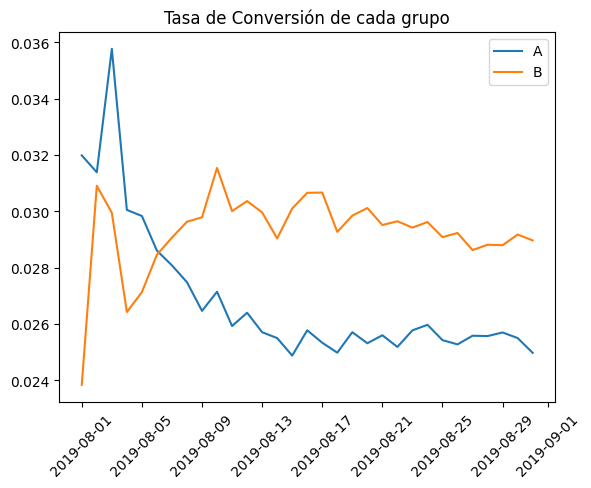

In [38]:
# calcular la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# trazar los gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title("Tasa de Conversión de cada grupo")
plt.xticks(rotation=45)
plt.legend()


La tasa de conversión del grupo A, aunque inicia las pruebas mucho mas alta que la del grupo B, este ultimo logra superar al grupo A y estabilizarse por encima de este con una tasa alrededor del 3%, mientras que el grupo A se estabiliza con una tasa alrededor de 2,6%

2.5 Gráfico de dispersión del número de pedidos por usuario

Text(0, 0.5, 'Número de pedidos')

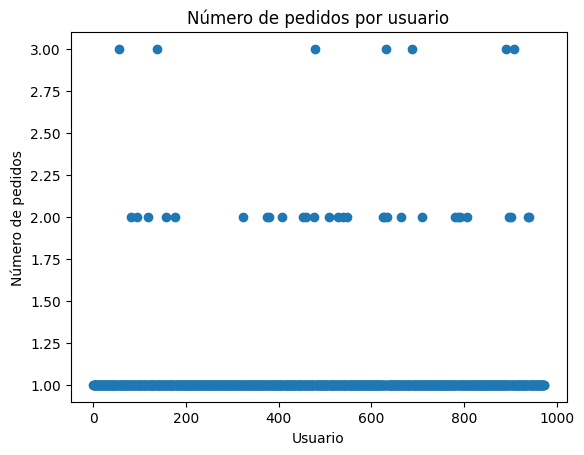

In [39]:

#calcular el numero de pedidos por usuario 
orders_by_users= orders_clean.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_users.columns = ['visitorId', 'orders']

#grafica de dispersiòn

plt.scatter(range(len(orders_by_users)), orders_by_users['orders'])
plt.title("Número de pedidos por usuario")
plt.xlabel("Usuario")
plt.ylabel("Número de pedidos")



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, buen trabajo con el grafico desplegado para estudiar la distribución del numero de pedidos por cliente.   </div>

Se evidencian usuarios atipicos con 2 y  3 pedidos. La mayoría de usuarios ha realizado 1 pedido

2.6 Cálculo de percentiles 95 y 99 de número de pedidos por usuario

In [40]:
print(np.percentile(orders_by_users['orders'], [95, 95, 99]))

[1. 1. 2.]


No mas del 5% de los usuarios realizaron mas de 1 pedido y no mas del 1% realizaron mas de 2 pedidos. Por lo anterior, se define una anomalìa como un cliente que realiza mas de 1 pedido.

2.7 Gráfico de dispersión de precios de los pedidos 

Text(0, 0.5, 'Precio - $')

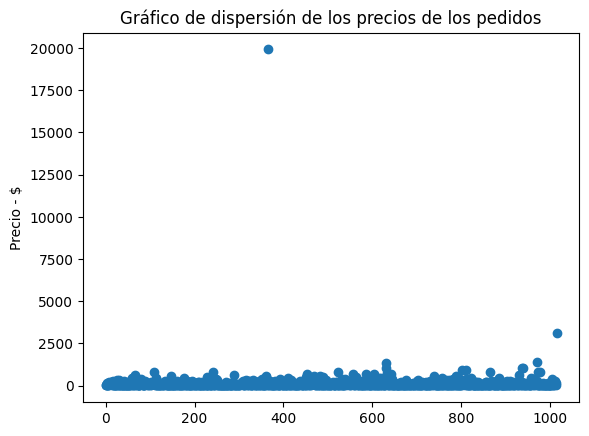

In [41]:
#calcular los valores del eje x
x_values= pd.Series(range(0, len(orders_clean["revenue"])))

#grafica de dispersión

plt.scatter(x_values, orders_clean["revenue"])
plt.title("Gráfico de dispersión de los precios de los pedidos")
plt.ylabel("Precio - $")

Se observan pedidos con valores atipicos (los mas visibles son uno de 20.000 y uno de $2.500)

2.8 Cálculo de percentiles 95 y 99 para los precios de los pedidos

In [42]:
print(np.percentile(orders_clean['revenue'], [95, 95, 99]))

[414.275 414.275 830.3  ]


Menos del 5% de los pedidos cuesta 414, mientras que menos del 1% de los pedidos cuesta $830. Se establece el valor de los valores anòmalos en mayores de 500

2.9 Significancia estadistica de la diferencia en la conversiòn entre los grupos. Datos sin procesar

In [43]:
ordersByUsersA = orders_clean[orders_clean['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders_clean[orders_clean['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.011
0.160


Dado que el resultado de la primera metrica (Prueba de Mann-Whitney) es 0.011, se puede concluir que hay una diferencia estadísticamente significativa entre los grupos A y B. (Un p-valor de 0.011 (< 0.05) indica que rechazamos la hipótesis nula)

La segunda metrica (Diferencia relativa) del grupo B con respecto al grupo A es 16%, significa que el grupo B tiene un 16% más conversión que el grupo A que es una diferencia bastante grande en este contexto

2.10 Significancia estadìstica de la diferencia de tamaño prom. de compra entre los grupos- Datos sin procesar

In [44]:
print('{0:.3f}'.format(st.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], orders_clean[orders_clean['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()/orders_clean[orders_clean['group']=='A']['revenue'].mean()-1))


0.862
0.278


El resultado de la primera metrica (Prueba de Mann-Whitney) es 0.862 y este valor es > 0.05 indica que podemos aceptar la Hipotesis nula e inferir que el tamaño prom. de compra de los dos grupos es estadisticamente igual. Sin embargo, la Diferencia relativa del tamaño prom.de compra del grupo B es 28% mas grande y pudo ser afectada por valores atipicos encontrados anteriormente

2.11 Significancia estadística de la diferencia de conversion de los dos grupos - Datos filtrados sin anomalias (Sin cantidad de pedidos > 1 y valores mayores de $500)

In [47]:
# Encontrar el numero total de usuarios anomalos

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0)
usersWithExpensiveOrders = orders_clean[orders_clean['revenue'] > 500 ]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
dtype: int64
(72,)


En total hay 72 usuarios con anomalìas que serìa n filtrados de los DF para volver a calcular la significancia estadìstica y diferencia relativa de las variables Tasa de conversion y tamaño prom. de compra 

In [53]:
#filtrar DF 

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.010
0.186


Los resultados de la conversión casi no cambiaron con respecto al anàlisis de los datos sin filtrar

2.12 Significancia estadistica de la dif. de tamaño de compra prom entre los grupos.  Datos filtrados sin anomalias (Sin cantidad de pedidos > 1 y valores mayores de $500)

In [65]:
group_A_filtered = orders_clean[
    np.logical_and(
        orders_clean['group'] == 'A',
        np.logical_not(orders_clean['visitorId'].isin(abnormalUsers))
    )
]['revenue']

group_B_filtered = orders_clean[
    np.logical_and(
        orders_clean['group'] == 'B',
        np.logical_not(orders_clean['visitorId'].isin(abnormalUsers))
    )
]['revenue']
# Prueba de significancia estadística
p_value_filtered = st.mannwhitneyu(group_A_filtered, group_B_filtered)[1]
print("P-valor: {0:.3f}".format(p_value_filtered))

#direfencia relativa 
print("{0:.3f}".format(
    orders_clean[
        np.logical_and(
            orders_clean['group'] == 'B',
            np.logical_not(orders_clean['visitorId'].isin(abnormalUsers))
        )
    ]['revenue'].mean() / 
    orders_clean[
        np.logical_and(
            orders_clean['group'] == 'A',
            np.logical_not(orders_clean['visitorId'].isin(abnormalUsers))
        )
    ]['revenue'].mean() - 1
))

P-valor: 0.992
0.016



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>



Excelente trabajo con el desarrollo de esta sección donde hacemos las pruebas estadísticas </div>

La significancia estadìstica sigue siendo mayor que 0.05 por lo que podemos aceptar la Hipotesis nula e inferir que el tamaño de compra prom. de los dos grupos es igual estadìsticamente.
Por otro lado, la diferencia relativa bajó de 27,8% a 16%

2.13 Recomendaciones y conclusiones

1. Los datos sin procesar y los datos filtrados relevaron diferencias estadìsticas en la conversiòn de los grupos A y B. (Valores menores que 0.05)
2. Ni los datos sin procesar ni los datos filtrados revelaron diferencias estadìsticas en el tamaño promedio de compra de los dos grupos (Valores mayores que 0.05)
3. El grafico que muestra la diferencia en la Tasa de conversion de los dos grupos nos dice que la conversiòn del grupo A es peor que la del grupo B y no parecen alcanzar a los del grupo B.
4. El grafico que muestra la diferencia entre el tamaño prom. de compra de los dos grupos es alrededor de 30% siendo mas grande el del grupo B

### Recomendaciones
El grupo B muestra ser mejor en cuanto a Tasa de conversion que el grupo A y se podrìa concluir que bajo este paràmetro se podria detener la prueba (Graficos que mostraban que se estabilizaron al final las variables) siendo este grupo el lìder.
